# Project: FBI Gun Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data is provided by the FBI, it contains the number of firearm checks by month, state, and type. Census data about each state are also provided. I'm going to try and find if there are any relations between gun registrations and any census data.

Research Questions include:
1. Which states have the highest guns per capita in April 2010 and July 2016?
2. How did guns per capita improve from 2010 to 2016?
3. Is there any relation between total gun purchases and any census data?
4. Which states have the highest gun purchases?
5. How did gun sales improve over time since Nov. 1998?
6. Which states increased the most in gun purchases over time from Nov. 1998 to Nov. 2016?

In [1]:
# import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# modify display options to view 100 rows and 100 columns max of a dataframe
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

<a id='wrangling'></a>
## Data Wrangling
<br><br>

In [3]:
# load the data
guns_df = pd.read_excel("gun_data.xlsx")
census_df = pd.read_csv("U.S. Census Data.csv")

In [4]:
guns_df.head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,1.0,0.0,26.0,16.0,3.0,0.0,0.0,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,7.0,0.0,3657.0,1416.0,6.0,264.0,28.0,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


In [5]:
guns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

* Structure:
    * There's not a lot to discuss about the guns_df structure.
* Problems:
    * It has missing values
    * the 'month' column doesn't have the appropriate datatype.

In [6]:
census_df

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653","1,360,301","1,567,582","12,830,632","6,483,802","3,046,355","2,853,118","4,339,367","4,533,372","1,328,361","5,773,552","6,547,629","9,883,640","5,303,925","2,967,297","5,988,927","989,415","1,826,341","2,700,551","1,316,470","8,791,894",2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,6.40%,6.80%,6.00%,6.40%,6.40%,6.70%,6.20%,6.60%,4.90%,6.10%,5.30%,5.80%,6.40%,6.30%,6.10%,6.00%,7.00%,6.30%,4.80%,5.80%,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,5.70%,7.10%,6.40%,7.80%,6.50%,6.70%,6.60%,7.20%,6.50%,6.90%,5.20%,6.30%,5.60%,6.00%,6.70%,7.10%,6.50%,6.30%,7.20%,6.90%,5.30%,6.20%,0.07,0.06,0.066,0.066,0.062,0.07,0.062,0.057,0.055,0.065,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,24.40%,21.60%,26.00%,22.90%,23.80%,23.30%,24.60%,22.80%,23.80%,19.10%,22.40%,20.20%,22.10%,23.30%,24.10%,22.80%,21.80%,24.80%,23.00%,19.50%,22.20%,0.236,0.212,0.227,0.233,0.225,0.245,0.212,0.209,0.197,0.221,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,25.70%,22.30%,27.40%,24.40%,24.80%,23.90%,25.50%,23.60%,24.70%,20.70%,23.40%,21.70%,23.70%,24.20%,25.50%,23.80%,22.60%,25.10%,24.60

In [7]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

* Structure:
    * It seems that there's a different dataset appended to the census dataset. This dataset contains the meaning for each fact note and value flag that are used in the census dataset. As the dataset contains only two columns, that explains all those missing values, as when the dataset was appended to the census dataset, it didn't match all the columns and hence it was just filled with NaN values.
* Problems:
    * Has missing values.
    * Numerical values represented as strings.
    * If we looked at the rows containing percentages, we'll find proportions mixed with those percentages.

## Cleaning census_df dataframe

In [8]:
# we'll need to merge the two dataframes together, but we'll have to make some changes to the census_df
census_df.set_index("Fact", inplace=True)  # we'll first set the index to the column 'Fact'
# now we'll extract the fact notes and value flags info that are at the end of the census_df dataframe as we'll need it later when we clean the dataset
fact_notes_df = census_df.loc["(a)":"(c)", "Fact Note"]
value_flags_df = census_df.loc["-":, "Fact Note"]

In [9]:
census_df = census_df.transpose()  # then we'll swap the rows with the columns by getting the transpose of the dataframe so that we get the states in a single column that we'll merge on later
census_df = census_df[1:]  # we'll skip the first row 'Fact Note' as we don't need it in our analysis
census_df

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,NaN,NOTE: FIPS Code values are enclosed in quotes to ensure leading zeros remain intact.,NaN,Value Notes,1,NaN,Fact Notes,(a),(b),(c),NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"363,170",3.50%,"2,230,185","2,171,853",68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,85.30%,5.20%,84.30%,23.50%,11.80%,10.70%,58.00%,53.00%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Handling missing values
There are some NaN values and other custom missing values.
1. The end of the dataframe is filled with missing values, as it seems that it was another dataframe appended to it, we'll remove them.
2. There are 'flags' instead of actual values (so they're considered missing values), which we'll how to replace using the value_flags_df.

In [10]:
# remove missing values
# by looking at the dataframe from the result of the cell above, we can see that some columns at the end of the dataframe are filled with missing values
# we can make sure by running the code below
census_df.isnull().all()

Fact
Population estimates, July 1, 2016,  (V2016)                                              False
Population estimates base, April 1, 2010,  (V2016)                                        False
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     False
Population, Census, April 1, 2010                                                         False
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    False
Persons under 5 years, percent, April 1, 2010                                             False
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   False
Persons under 18 years, percent, April 1, 2010                                            False
Persons 65 years and over, percent,  July 1, 2016,  (V2016)                               False
Persons 65 years and over, percent, April 1, 2010                                         False
Female persons, percent,  July 1, 2

In [11]:
# we could use code below to remove those columns
census_df.dropna(axis="columns", how="all")  # note: for the changes to be applied to the original dataframe, we need to pass the argument inplace=True to the drop method.
# but since we also won't need the column 'FIPS Code', we'll just drop all the columns at the end starting with that column using the code below
census_df.drop(columns=census_df.loc[:, "FIPS Code":].columns, inplace=True)

In [12]:
# some fields in the dataframe are filled with value flags which we can find what they mean from the value_flags_df dataframe that we sliced earlier
# value_flags_df.set_index("Fact", inplace=True)
for flag in value_flags_df.index:
    print(flag, value_flags_df.loc[flag], sep="\t")

-	Either no or too few sample observations were available to compute an estimate, or a ratio of medians cannot be calculated because one or both of the median estimates falls in the lowest or upper interval of an open ended distribution.
D	Suppressed to avoid disclosure of confidential information
F	Fewer than 25 firms
FN	Footnote on this item in place of data
nan	Not available
S	Suppressed; does not meet publication standards
X	Not applicable
Z	Value greater than zero but less than half unit of measure shown


In [13]:
# we can find out how many of these flags are there
for flag in value_flags_df.index:
    print(flag, census_df[census_df.iloc[:, :] == flag].count().sum(), sep="\t")

-	0
D	2
F	0
FN	1
nan	0
S	0
X	0
Z	4


In [14]:
# now we'll replace these flags in the dataframe
census_df.replace({"D": "0", "FN": "0", "Z": "0.0025"}, inplace=True)
# I chose this value for 'Z', we could've chosen any value in the open interval (0, 0.005) and they're very close to zero anyway.

### Handling the wrong datatypes
There are some problems with the datasets regarding the datatypes for the data
1. All the numerical values are represented as strings.
2. In columns containing percentages, there are proportions mixed with those percentages for the states from 'New Mexico' to 'Tennessee'.


In [15]:
# we'll convert all the strings representing numerical data to floats
census_df = census_df.applymap(lambda x: float(x.replace(",", "").replace("%", "").replace("$", "")))

In [16]:
census_df

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,4863300.0,4780131.0,1.700,4779736.0,6.000,6.400,22.600,23.700,16.100,13.800,51.600,51.500,69.300,26.800,0.700,1.400,0.1000,1.600,4.200,65.800,363170.0,3.500,2230185.0,2171853.0,68.700,125500.0,1139.0,345.0,717.0,15001.0,1848325.0,2.55,85.300,5.200,84.300,23.500,11.800,10.700,58.000,53.000,7576462.0,26039632.0,124809759.0,57746565.0,58564965.0,12145.0,24.4,43623.0,24091.0,17.100,98540.0,1634391.0,67370353.0,1.900,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33
Alaska,741894.0,710249.0,4.500,710231.0,7.300,7.600,25.200,26.400,10.400,7.700,47.700,48.000,66.100,3.800,15.200,6.300,1.3000,7.300,7.000,61.200,69323.0,7.400,310658.0,306967.0,63.400,250000.0,1827.0,554.0,1146.0,1503.0,250969.0,2.81,80.900,16.200,92.100,28.000,8.100,15.500,67.700,65.000,2221335

In [17]:
#there's still one issue with the data, it's that the states from 'New Mexico' to 'Tennessee' offer proportions instead
#of percentages in the columns that contain percentages.

# So in order to solve this issue, we'll first have to find all the columns that contain percentages

columns_with_percentages = []
for column in census_df.columns:
    if "percent" in column:
        columns_with_percentages.append(column)

In [18]:
# then we'll access the rows for these states and convert the proportions to percentages
census_df.loc["New Mexico":"Tennessee", columns_with_percentages] = census_df.loc["New Mexico":"Tennessee", columns_with_percentages].applymap(lambda proportion: proportion * 100)

In [19]:
# changing the columns names' writing style to snake_case (lowercase words separated by underscores)
census_df.rename(columns=lambda col: col.lower().replace(", ", "_").replace(" ", "_"), inplace=True)

In [20]:
# remove the columns name (when we flipped the dataframe earlier, the column 'Fact' kept its name,
# so we'll remove it now as it's unnecessary and it may confuse the reader as he may that it's labelling the states not the facts)
census_df.columns.name = ""

In [21]:
census_df.index.name = "state"  # rename the index to 'state'

In [22]:
census_df.head()

,population_estimates_july_1_2016__(v2016),population_estimates_base_april_1_2010__(v2016),population_percent_change_-_april_1_2010_(estimates_base)_to_july_1_2016__(v2016),population_census_april_1_2010,persons_under_5_years_percent_july_1_2016__(v2016),persons_under_5_years_percent_april_1_2010,persons_under_18_years_percent_july_1_2016__(v2016),persons_under_18_years_percent_april_1_2010,persons_65_years_and_over_percent__july_1_2016__(v2016),persons_65_years_and_over_percent_april_1_2010,female_persons_percent__july_1_2016__(v2016),female_persons_percent_april_1_2010,white_alone_percent_july_1_2016__(v2016),black_or_african_american_alone_percent_july_1_2016__(v2016),american_indian_and_alaska_native_alone_percent_july_1_2016__(v2016),asian_alone_percent_july_1_2016__(v2016),native_hawaiian_and_other_pacific_islander_alone_percent_july_1_2016__(v2016),two_or_more_races_percent_july_1_2016__(v2016),hispanic_or_latino_percent_july_1_2016__(v2016),white_alone_not_hispanic_or_latino_percent_july_1_2016__(v2016),veterans_2011-2015,foreign_born_persons_percent_2011-2015,housing_units__july_1_2016__(v2016),housing_units_april_1_2010,owner-occupied_housing_unit_rate_2011-2015,median_value_of_owner-occupied_housing_units_2011-2015,median_selected_monthly_owner_costs_-with_a_mortgage_2011-2015,median_selected_monthly_owner_costs_-without_a_mortgage_2011-2015,median_gross_rent_2011-2015,building_permits_2016,households_2011-2015,persons_per_household_2011-2015,living_in_same_house_1_year_ago_percent_of_persons_age_1_year+_2011-2015,language_other_than_english_spoken_at_home_percent_of_persons_age_5_years+_2011-2015,high_school_graduate_or_higher_percent_of_persons_age_25_years+_2011-2015,bachelor's_degree_or_higher_percent_of_persons_age_25_years+_2011-2015,with_a_disability_under_age_65_years_percent_2011-2015,persons__without_health_insurance_under_age_65_years_percent,in_civilian_labor_force_total_percent_of_population_age_16_years+_2011-2015,in_civilian_labor_force_female_percent_of_population_age_16_years+_2011-2015,"total_accommodation_and_food_services_sales_2012_($1,000)","total_health_care_and_social_assistance_receipts/revenue_2012_($1,000)","total_manufacturers_shipments_2012_($1,000)","total_merchant_wholesaler_sales_2012_($1,000)","total_retail_sales_2012_($1,000)",total_retail_sales_per_capita_2012,mean_travel_time_to_work_(minutes)_workers_age_16_years+_2011-2015,median_household_income_(in_2015_dollars)_2011-2015,per_capita_income_in_past_12_months_(in_2015_dollars)_2011-2015,persons_in_poverty_percent,total_employer_establishments_2015,total_employment_2015,"total_annual_payroll_2015_($1,000)",total_employment_percent_change_2014-2015,total_nonemployer_establishments_2015,all_firms_2012,men-owned_firms_2012,women-owned_firms_2012,minority-owned_firms_2012,nonminority-owned_firms_2012,veteran-owned_firms_2012,nonveteran-owned_firms_2012,population_per_square_mile_2010,land_area_in_square_miles_2010
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,4863300.0,4780131.0,1.7,4779736.0,6.0,6.4,22.6,23.7,16.1,13.8,51.6,51.5,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,363170.0,3.5,2230185.0,2171853.0,68.7,125500.0,1139.0,345.0,717.0,15001.0,1848325.0,2.55,85.3,5.2,84.3,23.5,11.8,10.7,58.0,53.0,7576462.0,26039632.0,124809759.0,57746565.0,58564965.0,12145.0,24.4,43623.0,24091.0,17.1,98540.0,1634391.0,67370353.0,1.9,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33
Alaska,741894.0,710249.0,4.5,710231.0,7.3,7.6,25.2,26.4,10.4,7.7,47.7,48.0,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,69323.0,7.4,310658.0,306967.0,63.4,250000.0,1827.0,554.0,1146.0,1503.0,250969.0,2.81,80.9,16.2,92.1,28.0,8.1,15.5,67.7,65.0,2221335.0,6375483.0,0.0,5216303.0,10474275.0,14320.0,19.0,72515.0,33413.0,9.9,20907.0,267999.0,15643303.0,0.4,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2,570640.95
Arizona,6931071.0,6392301.0,8.4,6392017.0,6.3,7.1,23.5,25.5,16.9,13.8,50.3,50.3,83.3,4.9,5.4,3.4,0.

## Cleaning guns_df dataframe

In [23]:
guns_df

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [24]:
# if we look further in the 'state' column, we'll find that it contains 55 unique values (i.e. states)
guns_df.state.unique().size

55

In [25]:
# we know that there are only 50 states, so something's clearly wrong and we need to know what are these 5 extra values
states = census_df.index  # we'll get the 50 states from the census_df dataset
for state in guns_df["state"].unique():
    if state not in states:  # if state is not one of the 50 states, print it out
        print(state)

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


#### we get these 5 values
with a quick google search, we find that 'District of Columbia' is actually just 'Washington'
* visit the links below:
    * [Washington, D.C. on Wikipedia](https://en.wikipedia.org/wiki/Washington,_D.C.#:~:text=Washington%2C%20D.C.%2C%20formally%20the%20District%20of%20Columbia)
    * [History of Washington, D.C. on Britannica](https://www.britannica.com/place/Washington-DC/History#:~:text=The%20new%20federal%20territory%20was%20named%20District%20of%20Columbia%20to%20honour%20explorer%20Christopher%20Columbus%2C%20and%20the%20new%20federal%20city%20was%20named%20for%20George%20Washington.)
    * [Is it “District of Columbia” or “Washington, DC" reddit post](https://www.reddit.com/r/washingtondc/comments/2atb6t/is_it_district_of_columbia_or_washington_dc/ciym3ua?utm_source=share&utm_medium=web2x&context=3)
    * [Is Washington DC and District of Columbia the same thing? question on quora](https://www.quora.com/Is-Washington-DC-and-District-of-Columbia-the-same-thing#:~:text=That%20said%2C%20there%20is%20a,isn't%20used%20like%20that.)


the other 4 are territories, they're not states, and we don't have any census data about them.
* see [this list of U.S territories.](https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#Territories)


In [26]:
# we'll remove all the entries for the territories
territories = ["Guam", "Mariana Islands", "Puerto Rico", "Virgin Islands"]
guns_df.drop(index=guns_df[guns_df["state"].isin(territories)].index, inplace=True)

In [27]:
# we'll drop all the columns between 'state' and 'totals' since we don't need all the stats about each gun type checks in our analysis
guns_df.drop(columns=guns_df.iloc[:, 2:-1].columns, inplace=True)

In [28]:
# convert the 'month' column datatype to a datetime object
guns_df["month"] = pd.to_datetime(guns_df["month"], format="%Y-%m")

In [29]:
# we'll store the 'District of Columbia' entries temporarily in a new dataframe
district_of_columbia_df = guns_df.loc[guns_df["state"] == "District of Columbia"]
district_of_columbia_df

,month,state,totals
8,2017-09-01,District of Columbia,61
63,2017-08-01,District of Columbia,80
118,2017-07-01,District of Columbia,68
173,2017-06-01,District of Columbia,74
228,2017-05-01,District of Columbia,82
...,...,...,...
12218,1999-03-01,District of Columbia,2
12273,1999-02-01,District of Columbia,3
12328,1999-01-01,District of Columbia,1
12383,1998-12-01,District of Columbia,0


In [30]:
# then we'll remove all 'District of Columbia' entries from the dataset
guns_df.drop(index=district_of_columbia_df.index, inplace=True)

In [31]:
# we'll set the 'month' column as the index for the dataframe
guns_df.set_index("month", inplace=True)

In [32]:
# we'll add the totals of 'District of Columbia' to the totals of 'Washington'
guns_df.loc[guns_df["state"] == "Washington", "totals"] = guns_df.loc[guns_df["state"] == "Washington", "totals"] + district_of_columbia_df.set_index("month")["totals"]

In [33]:
# print out all the census data points so that we can pick and choose what we need
for i, column in enumerate(census_df.columns):
    print(i, column, sep="\t")

0	population_estimates_july_1_2016__(v2016)
1	population_estimates_base_april_1_2010__(v2016)
2	population_percent_change_-_april_1_2010_(estimates_base)_to_july_1_2016__(v2016)
3	population_census_april_1_2010
4	persons_under_5_years_percent_july_1_2016__(v2016)
5	persons_under_5_years_percent_april_1_2010
6	persons_under_18_years_percent_july_1_2016__(v2016)
7	persons_under_18_years_percent_april_1_2010
8	persons_65_years_and_over_percent__july_1_2016__(v2016)
9	persons_65_years_and_over_percent_april_1_2010
10	female_persons_percent__july_1_2016__(v2016)
11	female_persons_percent_april_1_2010
12	white_alone_percent_july_1_2016__(v2016)
13	black_or_african_american_alone_percent_july_1_2016__(v2016)
14	american_indian_and_alaska_native_alone_percent_july_1_2016__(v2016)
15	asian_alone_percent_july_1_2016__(v2016)
16	native_hawaiian_and_other_pacific_islander_alone_percent_july_1_2016__(v2016)
17	two_or_more_races_percent_july_1_2016__(v2016)
18	hispanic_or_latino_percent_july_1_2016_

In [34]:
# we'll choose the census data we need for our analysis and filter out the rest
census_data_needed = [0, 1] + list(range(4, 20))
new_census_df = census_df.iloc[:, census_data_needed]

In [35]:
# find the columns for each of the years 2010 and 2016 and add each column to its appropriate list
columns_2010 = []
columns_2016 = []
for column in new_census_df.columns:
    if "april_1_2010" in column:
        columns_2010.append(column)
    else:
        columns_2016.append(column)

columns_2010, columns_2016

(['population_estimates_base_april_1_2010__(v2016)',
  'persons_under_5_years_percent_april_1_2010',
  'persons_under_18_years_percent_april_1_2010',
  'persons_65_years_and_over_percent_april_1_2010',
  'female_persons_percent_april_1_2010'],
 ['population_estimates_july_1_2016__(v2016)',
  'persons_under_5_years_percent_july_1_2016__(v2016)',
  'persons_under_18_years_percent_july_1_2016__(v2016)',
  'persons_65_years_and_over_percent__july_1_2016__(v2016)',
  'female_persons_percent__july_1_2016__(v2016)',
  'white_alone_percent_july_1_2016__(v2016)',
  'black_or_african_american_alone_percent_july_1_2016__(v2016)',
  'american_indian_and_alaska_native_alone_percent_july_1_2016__(v2016)',
  'asian_alone_percent_july_1_2016__(v2016)',
  'native_hawaiian_and_other_pacific_islander_alone_percent_july_1_2016__(v2016)',
  'two_or_more_races_percent_july_1_2016__(v2016)',
  'hispanic_or_latino_percent_july_1_2016__(v2016)',
  'white_alone_not_hispanic_or_latino_percent_july_1_2016__(v2016

In [36]:
# separate the 2010 and 2016 data into dataframes of their own
census_df_2010 = new_census_df[columns_2010]
census_df_2016 = new_census_df[columns_2016]

In [37]:
# now we'll do the same for the years 2011 to 2015
census_11_15_columns = []
for column in census_df.columns:
    if "2011-2015" in column:
        census_11_15_columns.append(column)

census_11_15_columns

['veterans_2011-2015',
 'foreign_born_persons_percent_2011-2015',
 'owner-occupied_housing_unit_rate_2011-2015',
 'median_value_of_owner-occupied_housing_units_2011-2015',
 'median_selected_monthly_owner_costs_-with_a_mortgage_2011-2015',
 'median_selected_monthly_owner_costs_-without_a_mortgage_2011-2015',
 'median_gross_rent_2011-2015',
 'households_2011-2015',
 'persons_per_household_2011-2015',
 'living_in_same_house_1_year_ago_percent_of_persons_age_1_year+_2011-2015',
 'language_other_than_english_spoken_at_home_percent_of_persons_age_5_years+_2011-2015',
 'high_school_graduate_or_higher_percent_of_persons_age_25_years+_2011-2015',
 "bachelor's_degree_or_higher_percent_of_persons_age_25_years+_2011-2015",
 'with_a_disability_under_age_65_years_percent_2011-2015',
 'in_civilian_labor_force_total_percent_of_population_age_16_years+_2011-2015',
 'in_civilian_labor_force_female_percent_of_population_age_16_years+_2011-2015',
 'mean_travel_time_to_work_(minutes)_workers_age_16_years+_

In [38]:
census_11_15 = census_df[census_11_15_columns]
census_11_15

,veterans_2011-2015,foreign_born_persons_percent_2011-2015,owner-occupied_housing_unit_rate_2011-2015,median_value_of_owner-occupied_housing_units_2011-2015,median_selected_monthly_owner_costs_-with_a_mortgage_2011-2015,median_selected_monthly_owner_costs_-without_a_mortgage_2011-2015,median_gross_rent_2011-2015,households_2011-2015,persons_per_household_2011-2015,living_in_same_house_1_year_ago_percent_of_persons_age_1_year+_2011-2015,language_other_than_english_spoken_at_home_percent_of_persons_age_5_years+_2011-2015,high_school_graduate_or_higher_percent_of_persons_age_25_years+_2011-2015,bachelor's_degree_or_higher_percent_of_persons_age_25_years+_2011-2015,with_a_disability_under_age_65_years_percent_2011-2015,in_civilian_labor_force_total_percent_of_population_age_16_years+_2011-2015,in_civilian_labor_force_female_percent_of_population_age_16_years+_2011-2015,mean_travel_time_to_work_(minutes)_workers_age_16_years+_2011-2015,median_household_income_(in_2015_dollars)_2011-2015,per_capita_income_in_past_12_months_(in_2015_dollars)_2011-2015
state,,,,,,,,,,,,,,,,,,,
Alabama,363170.0,3.5,68.700,125500.0,1139.0,345.0,717.0,1848325.0,2.55,85.3,5.2,84.3,23.5,11.8,58.0,53.0,24.4,43623.0,24091.0
Alaska,69323.0,7.4,63.400,250000.0,1827.0,554.0,1146.0,250969.0,2.81,80.9,16.2,92.1,28.0,8.1,67.7,65.0,19.0,72515.0,33413.0
Arizona,505794.0,13.5,62.800,167500.0,1343.0,380.0,913.0,2412212.0,2.69,81.3,26.9,86.0,27.5,8.2,59.3,54.5,24.8,50255.0,25848.0
Arkansas,220953.0,4.7,66.100,111400.0,1019.0,327.0,677.0,1138025.0,2.53,83.9,7.2,84.8,21.1,12.3,58.5,53.3,21.6,41371.0,22798.0
California,1777410.0,27.0,54.300,385500.0,2155.0,500.0,1255.0,12717801.0,2.96,85.2,43.9,81.8,31.4,6.8,63.1,57.2,28.0,61818.0,30318.0
Colorado,391725.0,9.8,64.300,247800.0,1577.0,419.0,1002.0,2024468.0,2.55,80.8,16.9,90.7,38.1,7.2,67.6,62.6,24.8,60629.0,32217.0
Connecticut,199331.0,13.9,67.000,270500.0,2067.0,833.0,1075.0,1352583.0,2.57,87.8,21.9,89.9,37.6,7.1,67.2,62.8,25.4,70331.0,38803.0
Delaware,71213.0,8.7,71.200,231500.0,1537.0,445.0,1018.0,344022.0,2.62,86.6,12.9,88.4,30.0,8.5,63.1,59.4,25.5,60509.0,30554.0
Florida,1507738.0,19.7,65.300,159000.0,1435.0,463.0,1002.0,7300494.0,2.63,83.8,28.1,86.9,27.3,8.5,58.8,54.7,26.4,47507.0,26829.0


In [39]:
# merge the 2010 data in guns_df with the 2010 data in census_df
guns_df_2010 = guns_df[(guns_df.index.year == 2010) & (guns_df.index.month == 4)]
guns_census_2010 = pd.merge(guns_df_2010, census_df_2010, on="state")
guns_census_2010

,state,totals,population_estimates_base_april_1_2010__(v2016),persons_under_5_years_percent_april_1_2010,persons_under_18_years_percent_april_1_2010,persons_65_years_and_over_percent_april_1_2010,female_persons_percent_april_1_2010
0,Alabama,20791,4780131.0,6.4,23.7,13.8,51.5
1,Alaska,6411,710249.0,7.6,26.4,7.7,48.0
2,Arizona,16578,6392301.0,7.1,25.5,13.8,50.3
3,Arkansas,14563,2916025.0,6.8,24.4,14.4,50.9
4,California,80750,37254522.0,6.8,25.0,11.4,50.3
5,Colorado,23609,5029324.0,6.8,24.4,10.9,49.9
6,Connecticut,15922,3574114.0,5.7,22.9,14.2,51.3
7,Delaware,1439,897936.0,6.2,22.9,14.4,51.6
8,Florida,42794,18804592.0,5.7,21.3,17.3,51.1
9,Georgia,24065,9688680.0,7.1,25.7,10.7,51.2


In [40]:
# merge the 2016 data in guns_df with the 2016 data in census_df
guns_df_2016 = guns_df[(guns_df.index.year == 2016) & (guns_df.index.month == 7)]
guns_census_2016 = pd.merge(guns_df_2016, census_df_2016, on="state")
guns_census_2016

,state,totals,population_estimates_july_1_2016__(v2016),persons_under_5_years_percent_july_1_2016__(v2016),persons_under_18_years_percent_july_1_2016__(v2016),persons_65_years_and_over_percent__july_1_2016__(v2016),female_persons_percent__july_1_2016__(v2016),white_alone_percent_july_1_2016__(v2016),black_or_african_american_alone_percent_july_1_2016__(v2016),american_indian_and_alaska_native_alone_percent_july_1_2016__(v2016),asian_alone_percent_july_1_2016__(v2016),native_hawaiian_and_other_pacific_islander_alone_percent_july_1_2016__(v2016),two_or_more_races_percent_july_1_2016__(v2016),hispanic_or_latino_percent_july_1_2016__(v2016),white_alone_not_hispanic_or_latino_percent_july_1_2016__(v2016)
0,Alabama,48927,4863300.0,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1000,1.6,4.2,65.8
1,Alaska,6793,741894.0,7.3,25.2,10.4,47.7,66.1,3.8,15.2,6.3,1.3000,7.3,7.0,61.2
2,Arizona,34496,6931071.0,6.3,23.5,16.9,50.3,83.3,4.9,5.4,3.4,0.3000,2.8,30.9,55.5
3,Arkansas,19378,2988248.0,6.4,23.6,16.3,50.9,79.4,15.7,1.0,1.6,0.3000,2.0,7.3,72.9
4,California,190218,39250017.0,6.3,23.2,13.6,50.3,72.7,6.5,1.7,14.8,0.5000,3.8,38.9,37.7
5,Colorado,43094,5540545.0,6.1,22.8,13.4,49.7,87.5,4.5,1.6,3.3,0.2000,3.0,21.3,68.6
6,Connecticut,29755,3576452.0,5.2,21.1,16.1,51.2,80.6,11.8,0.5,4.7,0.1000,2.3,15.7,67.7
7,Delaware,4494,952065.0,5.8,21.5,17.5,51.6,70.1,22.6,0.6,4.0,0.1000,2.6,9.2,62.9
8,Florida,125208,20612439.0,5.5,20.1,19.9,51.1,77.6,16.8,0.5,2.9,0.1000,2.1,24.9,54.9
9,Georgia,49183,10310371.0,6.4,24.4,13.1,51.3,61.2,32.0,0.5,4.1,0.1000,2.1,9.4,53.4


In [41]:
# merge the 2011-2015 data in guns_df with the 2011-2015 data in census_df
guns_df_11_15 = guns_df[(guns_df.index.year >= 2011) & (guns_df.index.year <= 2015)]
guns_census_11_15 = pd.merge(guns_df_11_15, census_11_15, on="state")
guns_census_11_15

,state,totals,veterans_2011-2015,foreign_born_persons_percent_2011-2015,owner-occupied_housing_unit_rate_2011-2015,median_value_of_owner-occupied_housing_units_2011-2015,median_selected_monthly_owner_costs_-with_a_mortgage_2011-2015,median_selected_monthly_owner_costs_-without_a_mortgage_2011-2015,median_gross_rent_2011-2015,households_2011-2015,persons_per_household_2011-2015,living_in_same_house_1_year_ago_percent_of_persons_age_1_year+_2011-2015,language_other_than_english_spoken_at_home_percent_of_persons_age_5_years+_2011-2015,high_school_graduate_or_higher_percent_of_persons_age_25_years+_2011-2015,bachelor's_degree_or_higher_percent_of_persons_age_25_years+_2011-2015,with_a_disability_under_age_65_years_percent_2011-2015,in_civilian_labor_force_total_percent_of_population_age_16_years+_2011-2015,in_civilian_labor_force_female_percent_of_population_age_16_years+_2011-2015,mean_travel_time_to_work_(minutes)_workers_age_16_years+_2011-2015,median_household_income_(in_2015_dollars)_2011-2015,per_capita_income_in_past_12_months_(in_2015_dollars)_2011-2015
0,Alabama,120914,363170.0,3.5,68.7,125500.0,1139.0,345.0,717.0,1848325.0,2.55,85.3,5.2,84.3,23.5,11.8,58.0,53.0,24.4,43623.0,24091.0
1,Alabama,71137,363170.0,3.5,68.7,125500.0,1139.0,345.0,717.0,1848325.0,2.55,85.3,5.2,84.3,23.5,11.8,58.0,53.0,24.4,43623.0,24091.0
2,Alabama,61156,363170.0,3.5,68.7,125500.0,1139.0,345.0,717.0,1848325.0,2.55,85.3,5.2,84.3,23.5,11.8,58.0,53.0,24.4,43623.0,24091.0
3,Alabama,56228,363170.0,3.5,68.7,125500.0,1139.0,345.0,717.0,1848325.0,2.55,85.3,5.2,84.3,23.5,11.8,58.0,53.0,24.4,43623.0,24091.0
4,Alabama,62770,363170.0,3.5,68.7,125500.0,1139.0,345.0,717.0,1848325.0,2.55,85.3,5.2,84.3,23.5,11.8,58.0,53.0,24.4,43623.0,24091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Wyoming,4021,48505.0,3.6,69.1,194800.0,1348.0,386.0,789.0,226865.0,2.49,81.9,7.1,92.3,25.7,8.5,67.7,62.7,18.3,58840.0,29803.0
2996,Wyoming,4346,48505.0,3.6,69.1,194800.0,1348.0,386.0,789.0,226865.0,2.49,81.9,7.1,92.3,25.7,8.5,67.7,62.7,18.3,58840.0,29803.0
2997,Wyoming,5184,48505.0,3.6,69.1,194800.0,1348.0,386.0,789.0,226865.0,2.49,81.9,7.1,92.3,25.7,8.5,67.7,62.7,18.3,58840.0,29803.0
2998,Wyoming,4591,48505.0,3.6,69.1,194800.0,1348.0,386.0,789.0,226865.0,2.49,81.9,7.1,92.3,25.7,8.5,67.7,62.7,18.3,58840.0,29803.0


<a id='eda'></a>
## Exploratory Data Analysis
<br><br>

In [42]:
# explore the guns_census_2010 data
guns_census_2010.describe()

,totals,population_estimates_base_april_1_2010__(v2016),persons_under_5_years_percent_april_1_2010,persons_under_18_years_percent_april_1_2010,persons_65_years_and_over_percent_april_1_2010,female_persons_percent_april_1_2010
count,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000
mean,24518.440000,6.163127e+06,6.546000,23.882000,13.292000,50.662000
std,34280.236382,6.848463e+06,0.757873,1.907524,1.664005,0.743102
min,963.000000,5.637670e+05,5.100000,20.700000,7.700000,48.000000
25%,7197.500000,1.833003e+06,6.200000,22.675000,12.425000,50.325000
50%,15242.500000,4.436412e+06,6.500000,23.700000,13.500000,50.750000
75%,26335.500000,6.680362e+06,6.975000,24.800000,14.275000,51.275000
max,211261.000000,3.725452e+07,9.500000,31.500000,17.300000,51.700000


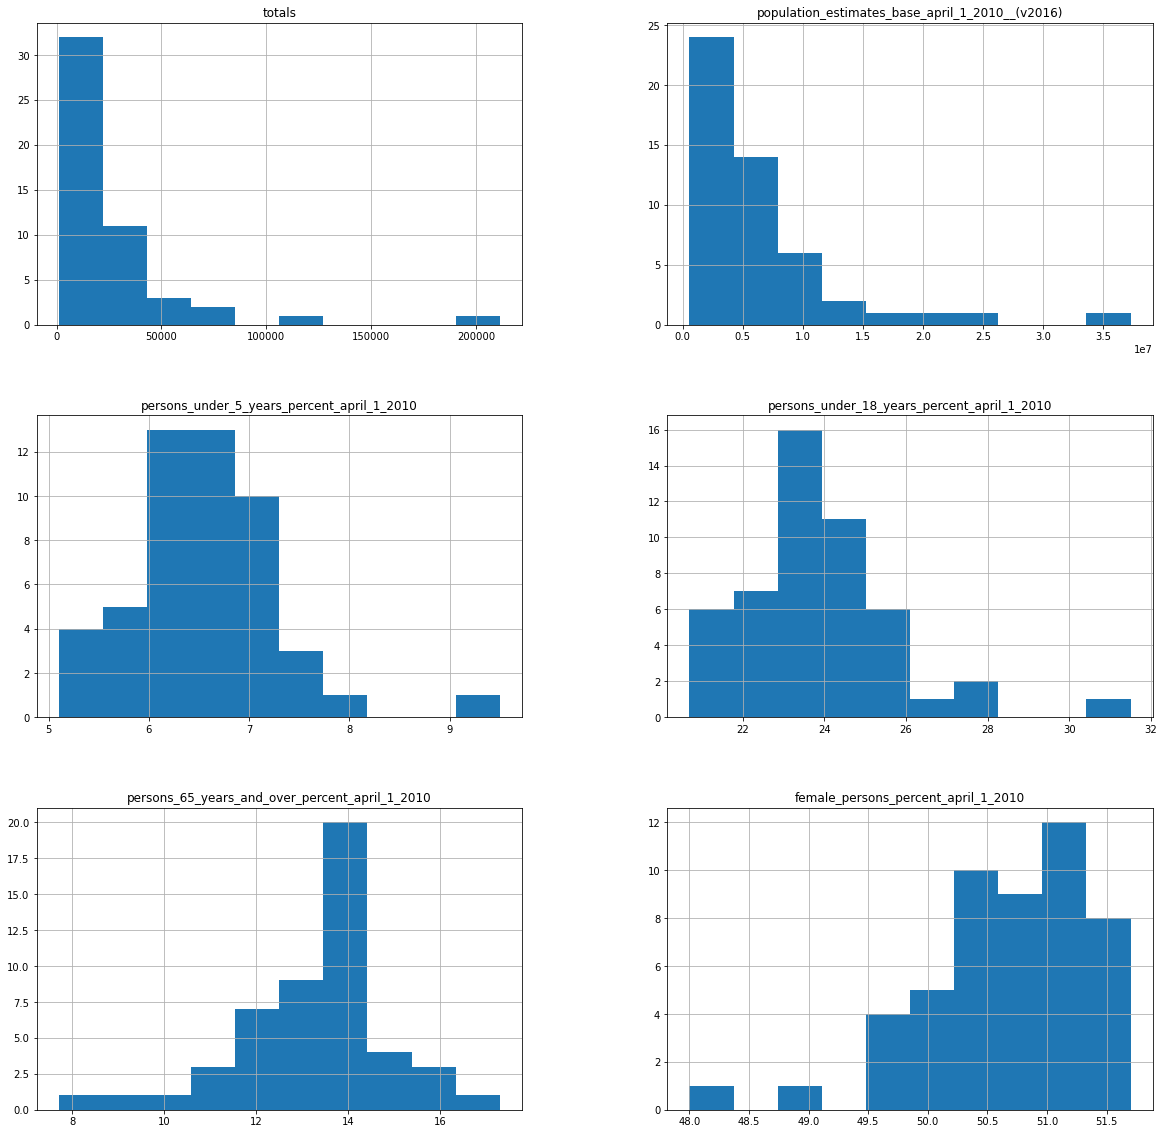

In [43]:
guns_census_2010.hist(figsize=(20, 20));

* We find from the plots above that:
    1. Persons under 18 years make around 22%-25% of the population.
    2. Persons 65 years and over make around 12%-15% of the population.
    2. Female persons make around half the population.

In [44]:
# explore the guns_census_2016 data
guns_census_2016.describe()

,totals,population_estimates_july_1_2016__(v2016),persons_under_5_years_percent_july_1_2016__(v2016),persons_under_18_years_percent_july_1_2016__(v2016),persons_65_years_and_over_percent__july_1_2016__(v2016),female_persons_percent__july_1_2016__(v2016),white_alone_percent_july_1_2016__(v2016),black_or_african_american_alone_percent_july_1_2016__(v2016),american_indian_and_alaska_native_alone_percent_july_1_2016__(v2016),asian_alone_percent_july_1_2016__(v2016),native_hawaiian_and_other_pacific_islander_alone_percent_july_1_2016__(v2016),two_or_more_races_percent_july_1_2016__(v2016),hispanic_or_latino_percent_july_1_2016__(v2016),white_alone_not_hispanic_or_latino_percent_july_1_2016__(v2016)
count,50.00000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,43711.60000,6.448927e+06,6.160000,22.750000,15.616000,50.564000,79.308000,11.024000,1.998000,4.342000,0.396200,2.944000,11.714000,69.320000
std,61545.08343,7.271769e+06,0.661168,1.977037,1.832068,0.801213,12.335908,9.631868,3.065109,5.561973,1.437623,3.186845,10.325993,15.663463
min,1565.00000,5.855010e+05,4.800000,19.000000,10.400000,47.700000,25.800000,0.600000,0.200000,0.800000,0.002500,1.200000,1.500000,22.100000
25%,11823.00000,1.850106e+06,5.800000,21.650000,14.925000,50.200000,72.475000,3.625000,0.500000,1.725000,0.100000,1.900000,5.000000,59.550000
50%,25379.50000,4.559320e+06,6.100000,22.750000,15.650000,50.650000,82.100000,8.200000,0.750000,2.850000,0.100000,2.200000,9.200000,72.950000
75%,46008.50000,7.198768e+06,6.400000,23.675000,16.500000,51.175000,87.500000,15.525000,1.600000,4.775000,0.200000,2.700000,13.550000,80.375000
max,363085.00000,3.925002e+07,8.300000,30.200000,19.900000,51.600000,94.800000,37.700000,15.200000,37.700000,10.200000,23.700000,48.500000,93.500000


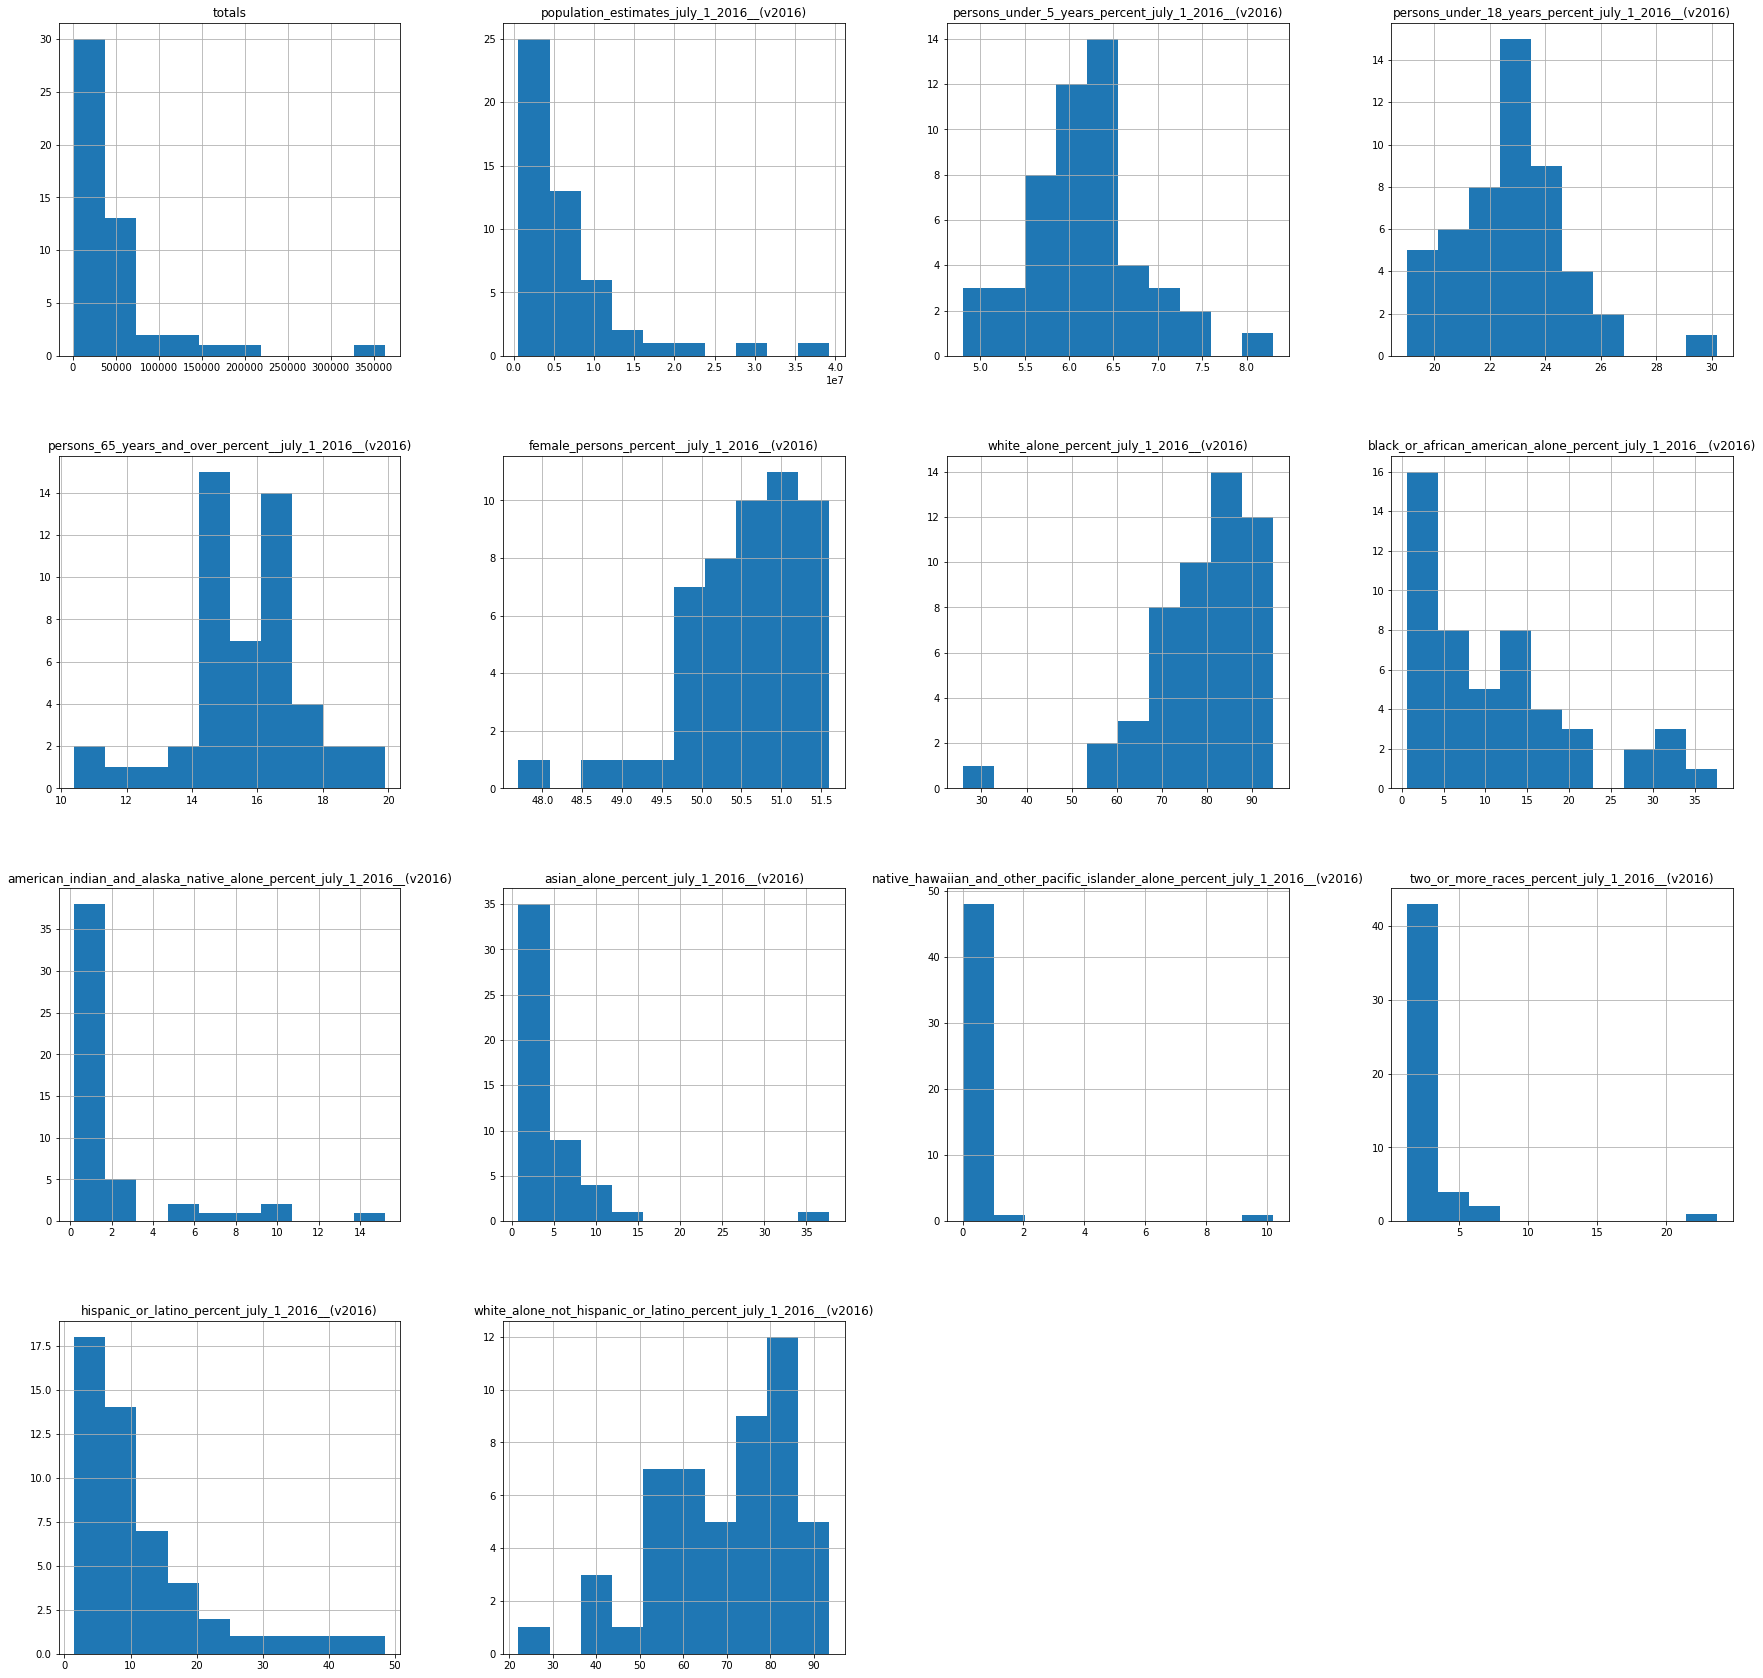

In [45]:
guns_census_2016.hist(figsize=(30, 30));

* We find from the plots above that:
    1. Persons under 18 years make around 22%-24% of the population.
    2. Persons 65 years and over make around 14%-18% of the population.
    2. Female persons make around half the population.
    3. The majority of the population are whites representing more than 70% (mostly between 80% and 90%) of the population.
        * They are followed by the black or african american population which is mostly between 1% and 15%.
        * All other races represent less than 10% of the population.

In [46]:
# explore the guns_census_11_15 data
guns_census_11_15.describe()

,totals,veterans_2011-2015,foreign_born_persons_percent_2011-2015,owner-occupied_housing_unit_rate_2011-2015,median_value_of_owner-occupied_housing_units_2011-2015,median_selected_monthly_owner_costs_-with_a_mortgage_2011-2015,median_selected_monthly_owner_costs_-without_a_mortgage_2011-2015,median_gross_rent_2011-2015,households_2011-2015,persons_per_household_2011-2015,living_in_same_house_1_year_ago_percent_of_persons_age_1_year+_2011-2015,language_other_than_english_spoken_at_home_percent_of_persons_age_5_years+_2011-2015,high_school_graduate_or_higher_percent_of_persons_age_25_years+_2011-2015,bachelor's_degree_or_higher_percent_of_persons_age_25_years+_2011-2015,with_a_disability_under_age_65_years_percent_2011-2015,in_civilian_labor_force_total_percent_of_population_age_16_years+_2011-2015,in_civilian_labor_force_female_percent_of_population_age_16_years+_2011-2015,mean_travel_time_to_work_(minutes)_workers_age_16_years+_2011-2015,median_household_income_(in_2015_dollars)_2011-2015,per_capita_income_in_past_12_months_(in_2015_dollars)_2011-2015
count,3000.000000,3.000000e+03,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,33521.766667,4.015940e+05,8.96200,50.585480,192026.000000,1462.200000,470.500000,879.880000,2.333058e+06,2.582000,84.716000,14.522000,88.224000,29.012000,9.062000,63.768000,59.294000,23.948000,54311.860000,28491.780000
std,41225.198385,3.793708e+05,6.02399,28.315731,78954.140124,342.032448,138.857903,179.316435,2.429491e+06,0.162483,2.218149,9.721668,3.059043,4.885265,1.811035,3.623997,3.746791,3.572387,8861.058783,4062.721624
min,870.000000,4.470800e+04,1.50000,0.536000,103100.000000,966.000000,293.000000,643.000000,2.268650e+05,2.320000,78.800000,2.500000,81.800000,19.200000,6.500000,53.900000,49.200000,16.900000,39665.000000,21057.000000
25%,9479.750000,1.329180e+05,4.30000,54.300000,136000.000000,1210.000000,378.000000,743.000000,7.366130e+05,2.480000,83.400000,6.900000,85.600000,25.900000,7.700000,61.200000,56.800000,21.600000,47507.000000,25346.000000
50%,21768.000000,3.020175e+05,6.75000,65.950000,165900.000000,1347.000000,439.000000,818.500000,1.718209e+06,2.550000,84.750000,10.900000,88.850000,28.200000,8.700000,63.450000,59.150000,24.000000,52601.000000,27669.500000
75%,39113.500000,5.057940e+05,13.40000,68.700000,237300.000000,1636.000000,505.000000,1002.000000,2.668912e+06,2.640000,86.300000,21.400000,90.900000,31.900000,10.200000,67.200000,62.700000,26.300000,60629.000000,31118.000000
max,541978.000000,1.777410e+06,27.00000,72.500000,515300.000000,2386.000000,973.000000,1438.000000,1.271780e+07,3.150000,90.200000,43.900000,92.800000,40.500000,14.400000,70.000000,66.200000,32.300000,74551.000000,38803.000000


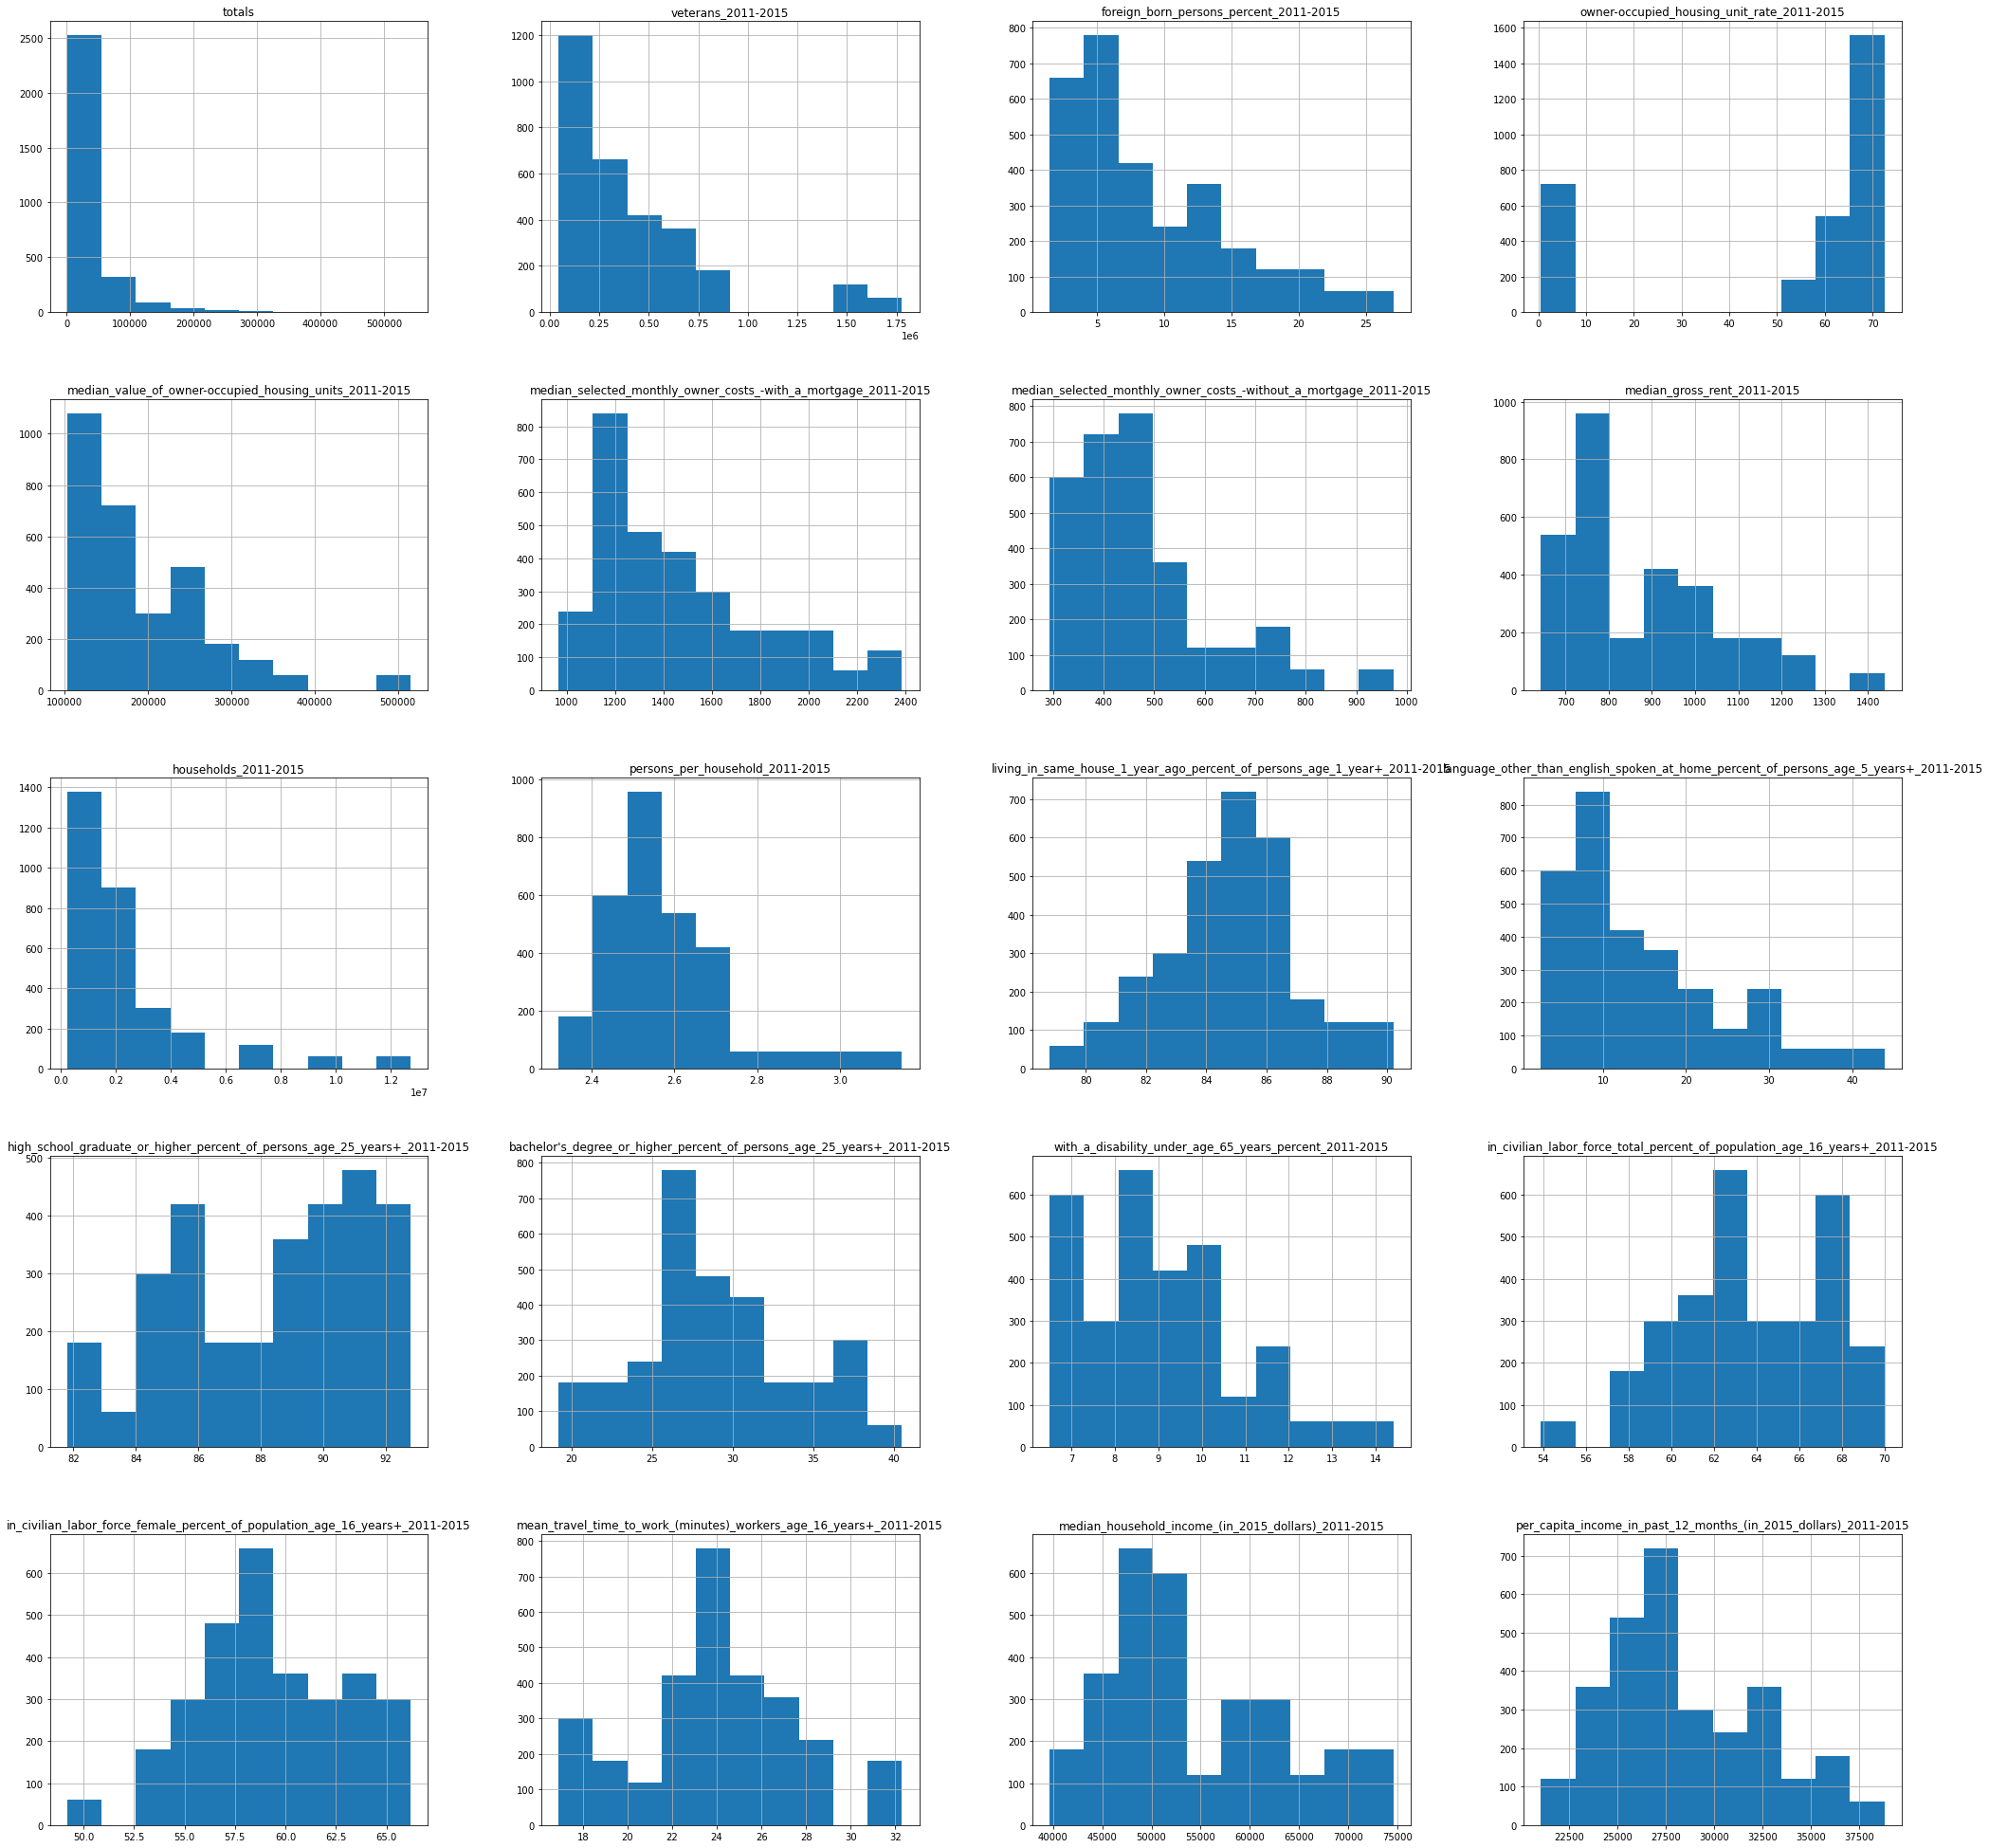

In [47]:
guns_census_11_15.hist(figsize=(35, 35));

* We find from the plots above that:
    1. The majority graduated from high school or higher making between 82%-92% of the population.
        * this percentage is reduced when we look at persons with at least a bachelor's degree to 25%-35% of the population.
    2. Foreign-born persons make around 14%-18% of the population.

and there are more points that we can make from the plots, but it's enough for now.
    
    

### Research Question 1: Which states have the highest guns per capita in April 2010 and July 2016?

In [48]:
# calculating guns per capita for the april 2010 dataset
guns_census_2010["guns_per_capita_april_2010"] = (guns_census_2010["totals"] / guns_census_2010["population_estimates_base_april_1_2010__(v2016)"]) * 100

In [49]:
# calculating guns per capita for the july 2016 dataset
guns_census_2016["guns_per_capita_july_2016"] = (guns_census_2016["totals"] / guns_census_2016["population_estimates_july_1_2016__(v2016)"]) * 100

In [50]:
# Top 10 states with the highest gun per capita in April 2010
top_10_gun_2010 = guns_census_2010.sort_values(by="guns_per_capita_april_2010", ascending=False)[["state", "guns_per_capita_april_2010"]].head(10)
top_10_gun_2010

,state,guns_per_capita_april_2010
16,Kentucky,4.868501
43,Utah,3.957867
1,Alaska,0.902641
25,Montana,0.845652
49,Wyoming,0.711819
47,West Virginia,0.603342
40,South Dakota,0.560185
33,North Dakota,0.553977
45,Virginia,0.551641
28,New Hampshire,0.524968


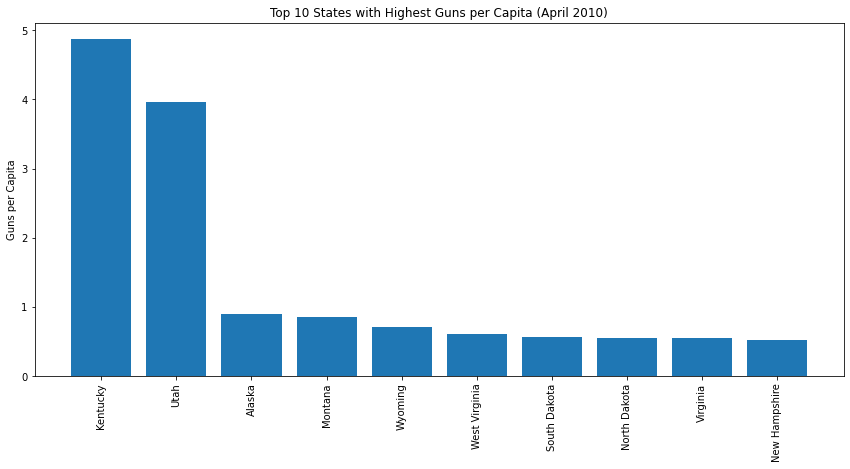

In [51]:
plt.bar(top_10_gun_2010["state"], top_10_gun_2010["guns_per_capita_april_2010"])
plt.title("Top 10 States with Highest Guns per Capita (April 2010)")
plt.ylabel("Guns per Capita")
plt.xticks(rotation="vertical")

# resize the figure
tmp = plt.gcf()
tmp.set_size_inches(14.5, 6.5);

* _**Answer for April 2010:**_
    1. Kentucky
    2. Utah
    3. Alaska
    4. Montana
    5. Wyoming
    6. West Virginia
    7. South Dakota
    8. North Dakota
    9. Virginia
    10. New Hampshire

In [52]:
# Top 10 states with the highest gun per capita in July 2016
top_10_gun_2016 = guns_census_2016.sort_values(by="guns_per_capita_july_2016", ascending=False)[["state", "guns_per_capita_july_2016"]].head(10)
top_10_gun_2016

,state,guns_per_capita_july_2016
16,Kentucky,8.183167
13,Indiana,1.331815
12,Illinois,1.314115
0,Alabama,1.006045
28,New Hampshire,0.979027
25,Montana,0.946649
47,West Virginia,0.916989
1,Alaska,0.915629
17,Louisiana,0.877102
41,Tennessee,0.866807


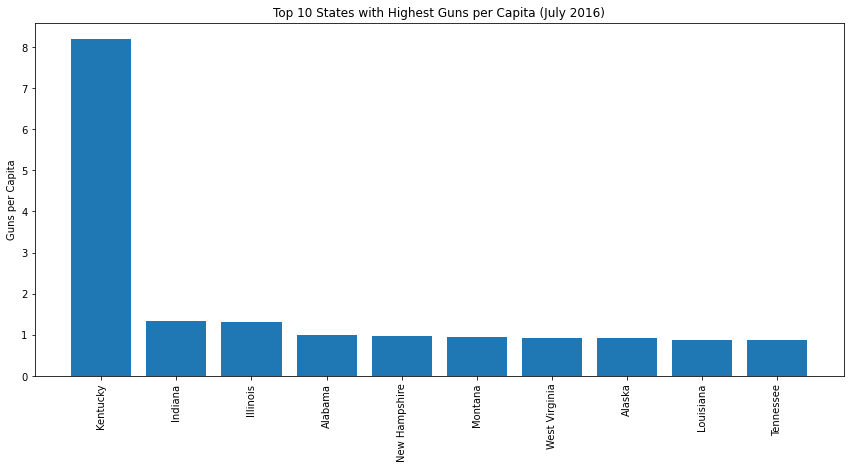

In [53]:
plt.bar(top_10_gun_2016["state"], top_10_gun_2016["guns_per_capita_july_2016"])
plt.title("Top 10 States with Highest Guns per Capita (July 2016)")
plt.ylabel("Guns per Capita")
plt.xticks(rotation="vertical")

# resize the figure
tmp = plt.gcf()
tmp.set_size_inches(14.5, 6.5);

* _**Answer for July 2016:**_
    1. Kentucky
    2. Indiana
    3. Illinois
    4. Alabama
    5. New Hampshire
    6. Montana
    7. West Virginia
    8. Alaska
    9. Louisiana
    10. Tennessee

### Research Question 2: How did guns per capita improve from 2010 to 2016?

In [54]:
guns_census_2010["guns_per_capita_april_2010"]  # guns per capita data in april 2010

0     0.434946
1     0.902641
2     0.259343
3     0.499413
4     0.216752
5     0.469427
6     0.445481
7     0.160256
8     0.227572
9     0.248383
10    0.070793
11    0.498453
12    0.420284
13    0.389134
14    0.319016
15    0.333984
16    4.868501
17    0.294983
18    0.381898
19    0.121099
20    0.133602
21    0.297275
22    0.496821
23    0.326875
24    0.438960
25    0.845652
26    0.226738
27    0.344134
28    0.524968
29    0.047942
30    0.417590
31    0.102724
32    0.245163
33    0.553977
34    0.271411
35    0.473130
36    0.418447
37    0.395572
38    0.113872
39    0.312210
40    0.560185
41    0.479855
42    0.258537
43    3.957867
44    0.328091
45    0.551641
46    0.414169
47    0.603342
48    0.289611
49    0.711819
Name: guns_per_capita_april_2010, dtype: float64

In [55]:
guns_census_2016["guns_per_capita_july_2016"]  # guns per capita data in july 2016

0     1.006045
1     0.915629
2     0.497701
3     0.648474
4     0.484632
5     0.777794
6     0.831970
7     0.472027
8     0.607439
9     0.477025
10    0.109551
11    0.722103
12    1.314115
13    1.331815
14    0.380803
15    0.486364
16    8.183167
17    0.877102
18    0.578454
19    0.203243
20    0.300656
21    0.404319
22    0.785659
23    0.732988
24    0.765419
25    0.946649
26    0.284671
27    0.400842
28    0.979027
29    0.112628
30    0.587165
31    0.149469
32    0.434847
33    0.721682
34    0.543706
35    0.661287
36    0.606161
37    0.673776
38    0.224152
39    0.659730
40    0.855736
41    0.866807
42    0.456551
43    0.577081
44    0.428118
45    0.518010
46    0.657890
47    0.916989
48    0.673542
49    0.783090
Name: guns_per_capita_july_2016, dtype: float64

In [56]:
# calculating the change in guns per capita from 2010 to 2016
capita_change = guns_census_2016["guns_per_capita_july_2016"] - guns_census_2010["guns_per_capita_april_2010"]

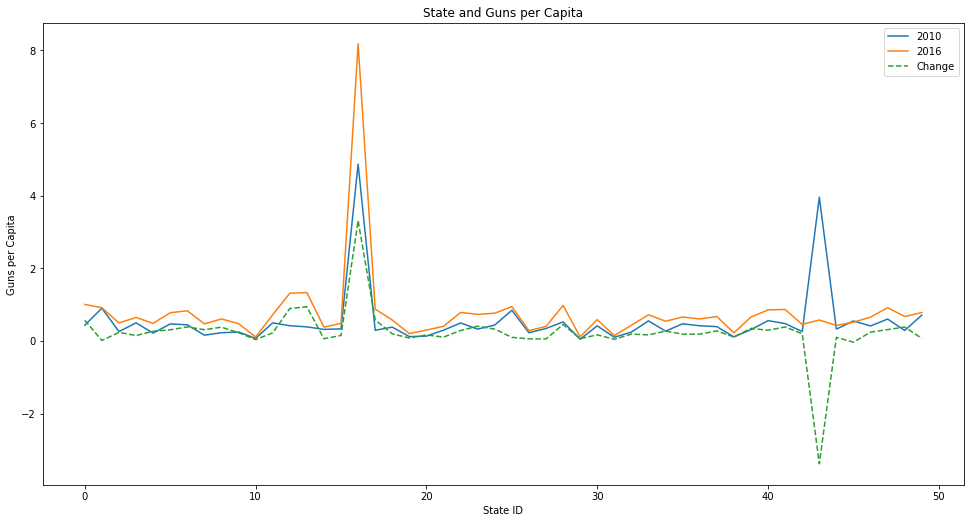

In [57]:
# plotting the guns per capita data for both years and its change
plt.plot(guns_census_2010["guns_per_capita_april_2010"], label="2010")
plt.plot(guns_census_2016["guns_per_capita_july_2016"], label="2016")
plt.plot(capita_change, linestyle="--", label="Change")
plt.title("State and Guns per Capita")
plt.xlabel("State ID")
plt.ylabel("Guns per Capita")
plt.legend()

# this code is to resize the figure
tmp = plt.gcf()
tmp.set_size_inches(16.5, 8.5);

### We see that guns per capita change spikes between the states number 13 and 19 (approx.) which are:

In [58]:
guns_census_2010.loc[13:19, "state"]

13      Indiana
14         Iowa
15       Kansas
16     Kentucky
17    Louisiana
18        Maine
19     Maryland
Name: state, dtype: object

### and it gets back to normal then it goes down between the states number 42 and 45 (approx.) which are:

In [59]:
guns_census_2010.loc[42:46, "state"]

42         Texas
43          Utah
44       Vermont
45      Virginia
46    Washington
Name: state, dtype: object

### it's mostly stable and not much has changed.

### Research Question 3: Is there any relation between total gun purchases and any census data?

In [60]:
# we'll use the .corr() method on the dataframes to find out if there's a correlation between the data
guns_census_2010.corr()["totals"].iloc[1:]

population_estimates_base_april_1_2010__(v2016)    0.369294
persons_under_5_years_percent_april_1_2010         0.238913
persons_under_18_years_percent_april_1_2010        0.280587
persons_65_years_and_over_percent_april_1_2010    -0.232559
female_persons_percent_april_1_2010                0.025392
guns_per_capita_april_2010                         0.818172
Name: totals, dtype: float64

### (For 2010 dataset) we find that there are weak correlations or no correlation at all between 'totals' and the other variables

In [61]:
guns_census_11_15.corr()["totals"]

totals                                                                                  1.000000
veterans_2011-2015                                                                      0.557761
foreign_born_persons_percent_2011-2015                                                  0.137901
owner-occupied_housing_unit_rate_2011-2015                                              0.028977
median_value_of_owner-occupied_housing_units_2011-2015                                 -0.140565
median_selected_monthly_owner_costs_-with_a_mortgage_2011-2015                         -0.093928
median_selected_monthly_owner_costs_-without_a_mortgage_2011-2015                      -0.152305
median_gross_rent_2011-2015                                                            -0.064757
households_2011-2015                                                                    0.539646
persons_per_household_2011-2015                                                         0.143041
living_in_same_house_1_year_ag

### (For 2011-2015 dataset) We find that the total number of gun registrations moderately correlates (moderate correlation means a correlation factor between 0.5 and 0.7) with the number of veterans and the number of households
### Below are scatter plots that show these correlations:

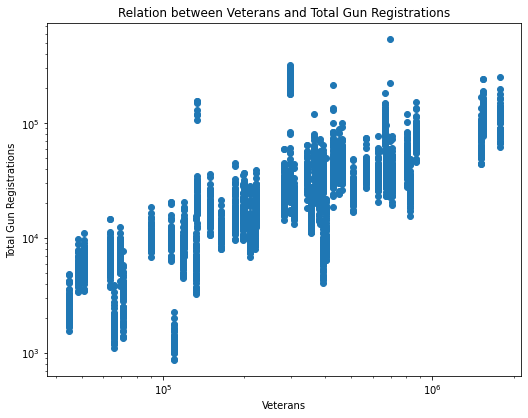

In [62]:
# scatter plots for these variables
plt.scatter(guns_census_11_15["veterans_2011-2015"], guns_census_11_15["totals"])
plt.title("Relation between Veterans and Total Gun Registrations")
plt.xlabel("Veterans")
plt.ylabel("Total Gun Registrations")
plt.xscale("log")
plt.yscale("log")

# resize the figure
tmp = plt.gcf()
tmp.set_size_inches(8.5, 6.5);

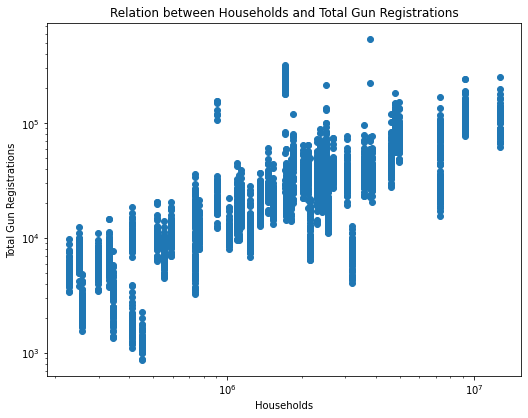

In [63]:
plt.scatter(guns_census_11_15["households_2011-2015"], guns_census_11_15["totals"])
plt.title("Relation between Households and Total Gun Registrations")
plt.xlabel("Households")
plt.ylabel("Total Gun Registrations")
plt.xscale("log")
plt.yscale("log")

# resize the figure
tmp = plt.gcf()
tmp.set_size_inches(8.5, 6.5);

In [64]:
guns_census_2016.corr()["totals"].iloc[1:]  # I sliced the result to skip the 'totals' row

population_estimates_july_1_2016__(v2016)                                        0.528662
persons_under_5_years_percent_july_1_2016__(v2016)                               0.002900
persons_under_18_years_percent_july_1_2016__(v2016)                              0.038174
persons_65_years_and_over_percent__july_1_2016__(v2016)                         -0.099208
female_persons_percent__july_1_2016__(v2016)                                     0.143028
white_alone_percent_july_1_2016__(v2016)                                         0.023938
black_or_african_american_alone_percent_july_1_2016__(v2016)                     0.095021
american_indian_and_alaska_native_alone_percent_july_1_2016__(v2016)            -0.207725
asian_alone_percent_july_1_2016__(v2016)                                        -0.001919
native_hawaiian_and_other_pacific_islander_alone_percent_july_1_2016__(v2016)   -0.108046
two_or_more_races_percent_july_1_2016__(v2016)                                  -0.127632
hispanic_o

### (For 2016 dataset) we find that there's a moderate correlation between 'totals' and 'population_estimate...'
### Below is a scatter plot showing the relationship between them:

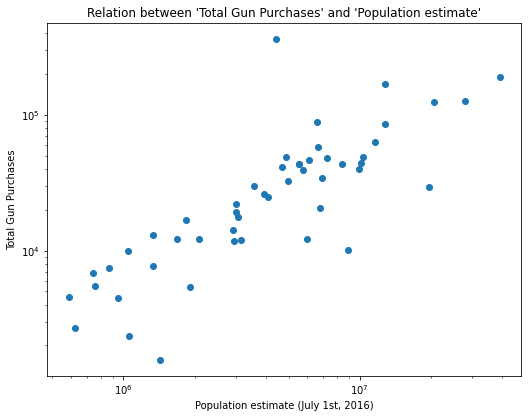

In [65]:
# scatter plot for 'totals' and 'population_estimates...'
plt.scatter(x=guns_census_2016["population_estimates_july_1_2016__(v2016)"], y=guns_census_2016["totals"])
plt.title("Relation between 'Total Gun Purchases' and 'Population estimate'")
plt.xlabel("Population estimate (July 1st, 2016)")
plt.ylabel("Total Gun Purchases")
plt.xscale("log")
plt.yscale("log")

# resize the figure
tmp = plt.gcf()
tmp.set_size_inches(8.5, 6.5);

### Research Question 4: Which states have the highest gun purchases?

In [66]:
# these are the top 10 states with the highest gun purchases since Nov. 1998
top_10_states = guns_df.groupby("state").totals.sum().sort_values(ascending=False).head(10)
top_10_states

state
Kentucky          29762434
Texas             19435186
California        19014063
Illinois          15471534
Pennsylvania      13133876
Florida           11695777
Ohio               8462744
North Carolina     7777689
Indiana            7737172
Tennessee          7311293
Name: totals, dtype: int64

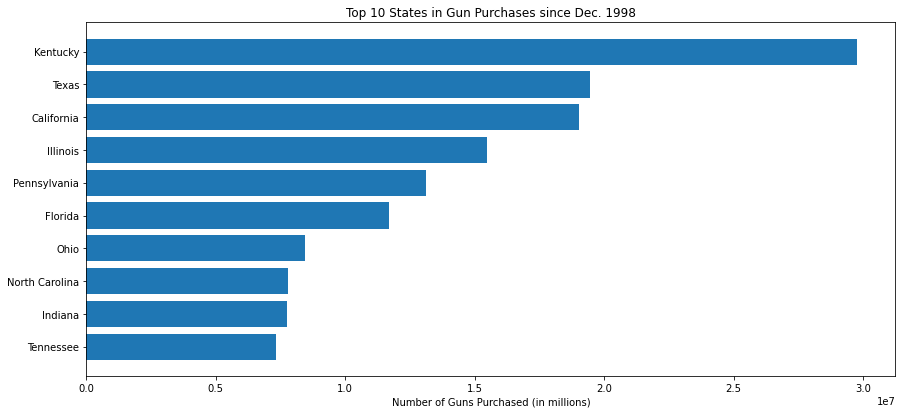

In [67]:
# a horizontal bar plot for these states
plt.barh(top_10_states.index[-1::-1], top_10_states[-1::-1])
plt.title("Top 10 States in Gun Purchases since Dec. 1998")
plt.xlabel("Number of Guns Purchased (in millions)")

# resize the figure
tmp = plt.gcf()
tmp.set_size_inches(14.5, 6.5);

* _**Answer:**_
    1. Kentucky
    2. Texas
    3. California
    4. Illinois
    5. Pennsylvania
    6. Florida
    7. Ohio
    8. North Carolina
    9. Indiana
    10. Tennessee

### Research Question 5: How did gun sales improve over time since Nov. 1998?

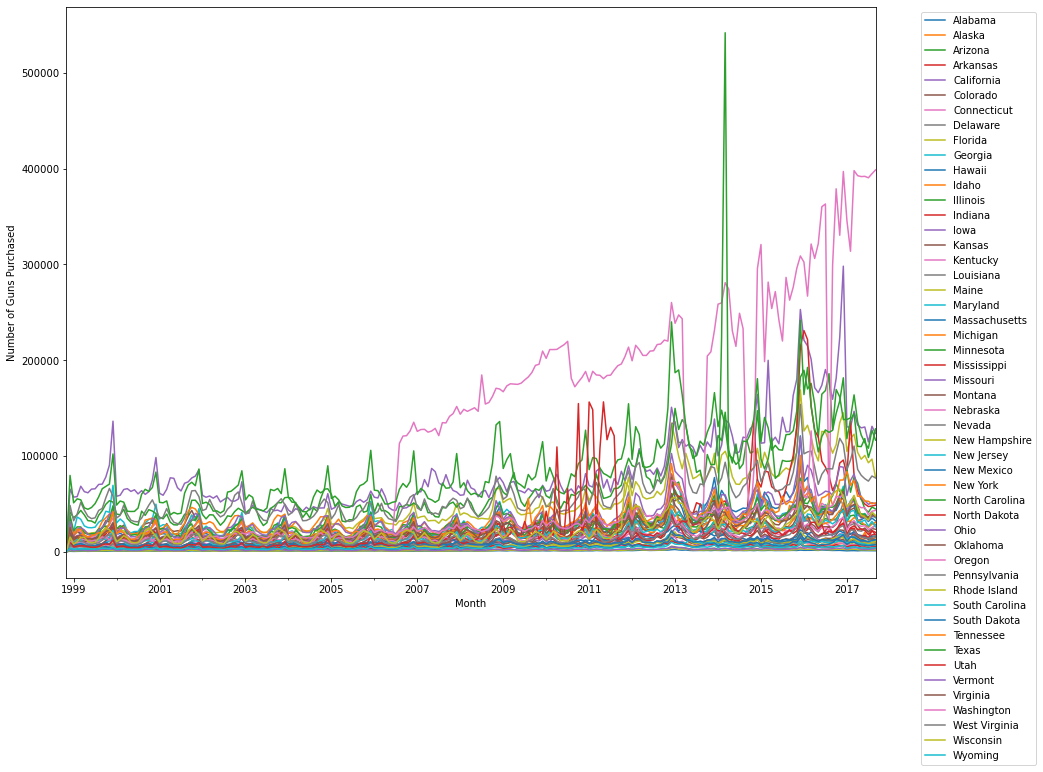

In [68]:
# this plot shows how sales improved from month to month since Nov. 1998 (Using matplotlib)
states_grp = guns_df.groupby(["state", "month"])  # group the guns_df dataframe by 'state' then by 'month'

for state in guns_df["state"].unique():  # loop through the states and plot each states total monthly sales
    states_grp.totals.sum()[state].plot(figsize=(8, 8), label=state)

plt.xlabel("Month")
plt.ylabel("Number of Guns Purchased")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # position the legend box outside the plot's boundaries

# resize the figure
tmp = plt.gcf()
tmp.set_size_inches(14.5, 10.5);

### We can see that some states at the bottom of the plot didn't change a lot from where they began. lots of other states have increased a lot but, overall, gun purchases are increasing.

### To know which states changed a lot and which states didn't, we can do the following:

### Research Question 6: Which states increased the most in gun purchases over time from Nov. 1998 to Nov. 2016?

In [69]:
monthly_sales_since_98 = states_grp["totals"].sum()  ## total monthly sales for each state since Nov. 1998

In [70]:
# total sales for each state for the month Nov. 1998
states_sales_98 = [monthly_sales_since_98.loc[state, "1998-11-01"] for state in states]

In [71]:
# total sales for each state for the month Nov. 2016
states_sales_2016 = [monthly_sales_since_98.loc[state, "2016-11-01"] for state in states]

In [72]:
# create a dataframe that contains each state and the change in sales from 1998 to 2016
state_to_sales_change = pd.DataFrame({"state": states, "sales_change":np.array(states_sales_2016) - np.array(states_sales_98)})
state_to_sales_change.set_index("state", inplace=True)  # set the 'state' column as the index for the dataframe
state_to_sales_change.sort_values(by="sales_change", ascending=False, inplace=True)  # sort the dataframe by 'sales_change' column in descending order

# print the states with the state that increased the most in gun sales in the top
for i, state in enumerate(state_to_sales_change.index):
    print(i+1, state, sep="\t")

1	Kentucky
2	California
3	Illinois
4	Texas
5	Florida
6	Pennsylvania
7	Indiana
8	Ohio
9	Tennessee
10	Wisconsin
11	Minnesota
12	Georgia
13	North Carolina
14	Virginia
15	Missouri
16	Washington
17	Michigan
18	Colorado
19	Alabama
20	New York
21	South Carolina
22	Oklahoma
23	Arizona
24	Louisiana
25	Oregon
26	Mississippi
27	Utah
28	Arkansas
29	West Virginia
30	Kansas
31	Massachusetts
32	Iowa
33	Maryland
34	Connecticut
35	New Hampshire
36	New Mexico
37	Nevada
38	Idaho
39	Montana
40	South Dakota
41	New Jersey
42	Maine
43	Nebraska
44	Alaska
45	North Dakota
46	Delaware
47	Wyoming
48	Vermont
49	Rhode Island
50	Hawaii


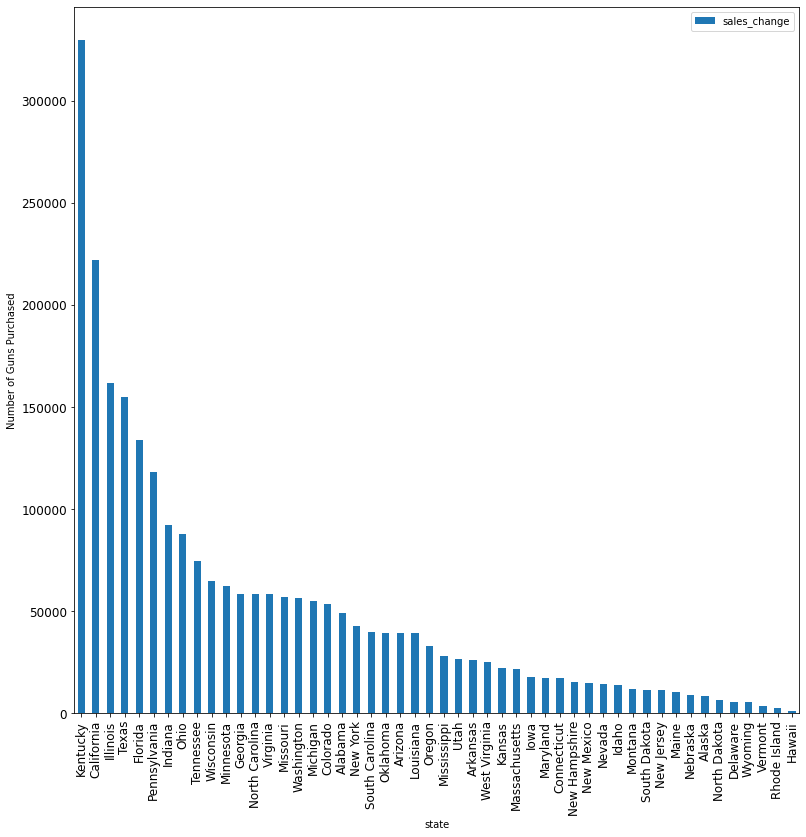

In [73]:
# bar plot for the results above
state_to_sales_change.plot(kind="bar", figsize=(13, 13), fontsize="large");
plt.ylabel("Number of Guns Purchased");

<a id='conclusions'></a>
## Conclusions

#### Research Question 1: Which states have the highest guns per capita in April 2010 and July 2016?
* _**Answer for April 2010:**_
    1. Kentucky
    2. Utah
    3. Alaska
    4. Montana
    5. Wyoming
    6. West Virginia
    7. South Dakota
    8. North Dakota
    9. Virginia
    10. New Hampshire
<br><br>
* _**Answer for July 2016:**_
    1. Kentucky
    2. Indiana
    3. Illinois
    4. Alabama
    5. New Hampshire
    6. Montana
    7. West Virginia
    8. Alaska
    9. Louisiana
    10. Tennessee

#### Research Question 2: How did guns per capita improve from 2010 to 2016?
* _**Answer:**_ It mostly stayed the same.

#### Research Question 3: Is there any relation between total gun purchases and any census data?
####  The correlations we found between the census data and gun purchases are just correlations and they do not guarantee that because one variable increased or decreased, it will 'cause' the other variable to increase or decrease (decrease or increase if it was a negative correlation) respectively. Correlation does not equal causation.
#### So for example, we found that there's a correlation between population estimate and gun purchases, that doesn't mean that an increase in population will cause an increase in gun purchases.

* _**Answer for 2010:**_ We find that there are weak correlations or no correlation at all between 'totals' and the other variables
* _**Answer for 2011-2015:**_ We find that the total number of gun registrations moderately correlates (moderate correlation means a correlation factor between 0.5 and 0.7) with the number of veterans and the number of households
* _**Answer for 2016**_ We find that there's a moderate correlation between 'totals' and 'population_estimate...'



#### Research Question 4: Which states have the highest gun purchases?
* _**Answer:**_
    1. Kentucky
    2. Texas
    3. California
    4. Illinois
    5. Pennsylvania
    6. Florida
    7. Ohio
    8. North Carolina
    9. Indiana
    10. Tennessee

#### Research Question 5: How did gun sales improve over time since Dec. 1998?
* _**Answer:**_ Gun sales increased over time.

#### Research Question 6: Which states increased the most in gun purchases over time from Nov. 1998 to Nov. 2016?
* _**Answer:**_ Top 10 of these states are (the full list is not included here as it will be too long.):
    1. Kentucky
    2. Florida
    3. California
    4. Texas
    5. Illinois
    6. Indiana
    7. Georgia
    8. Pennsylvania
    9. Ohio
    10. Tennessee


#### I want to refer back to this article from the dataset's [github page](https://www.google.com/url?q=https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md&sa=D&ust=1532469042126000) as it summarizes the limitations of the dataset

A bit more background, from The Trace:

>The FBI’s background check numbers come with caveats: As seen in the late February-early March 2014 bubble, many checks are for concealed carry permits, not actual gun sales. Kentucky runs a new check on each concealed carry license holder each month. And of course, the FBI’s numbers don’t include private gun sales, many of which do not require a background check. A forthcoming study conducted by Harvard researchers found that roughly 40 percent of respondents had acquired their most recent firearm without going through a background check. Despite those vagaries, the FBI’s NICS numbers are widely accepted as the best proxy for total gun sales in a given time period.

#### so with that said, these stats are not the ultimate truth, but they are as close as can be.